In [97]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For Data visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf # Deep Learning library
tf.random.set_seed(3) # Ensures reproducibility
from tensorflow import keras

In [98]:
# Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Target: 0 (Malignant), 1 (Benign)


1. Exploratory Data Analysis (EDA)

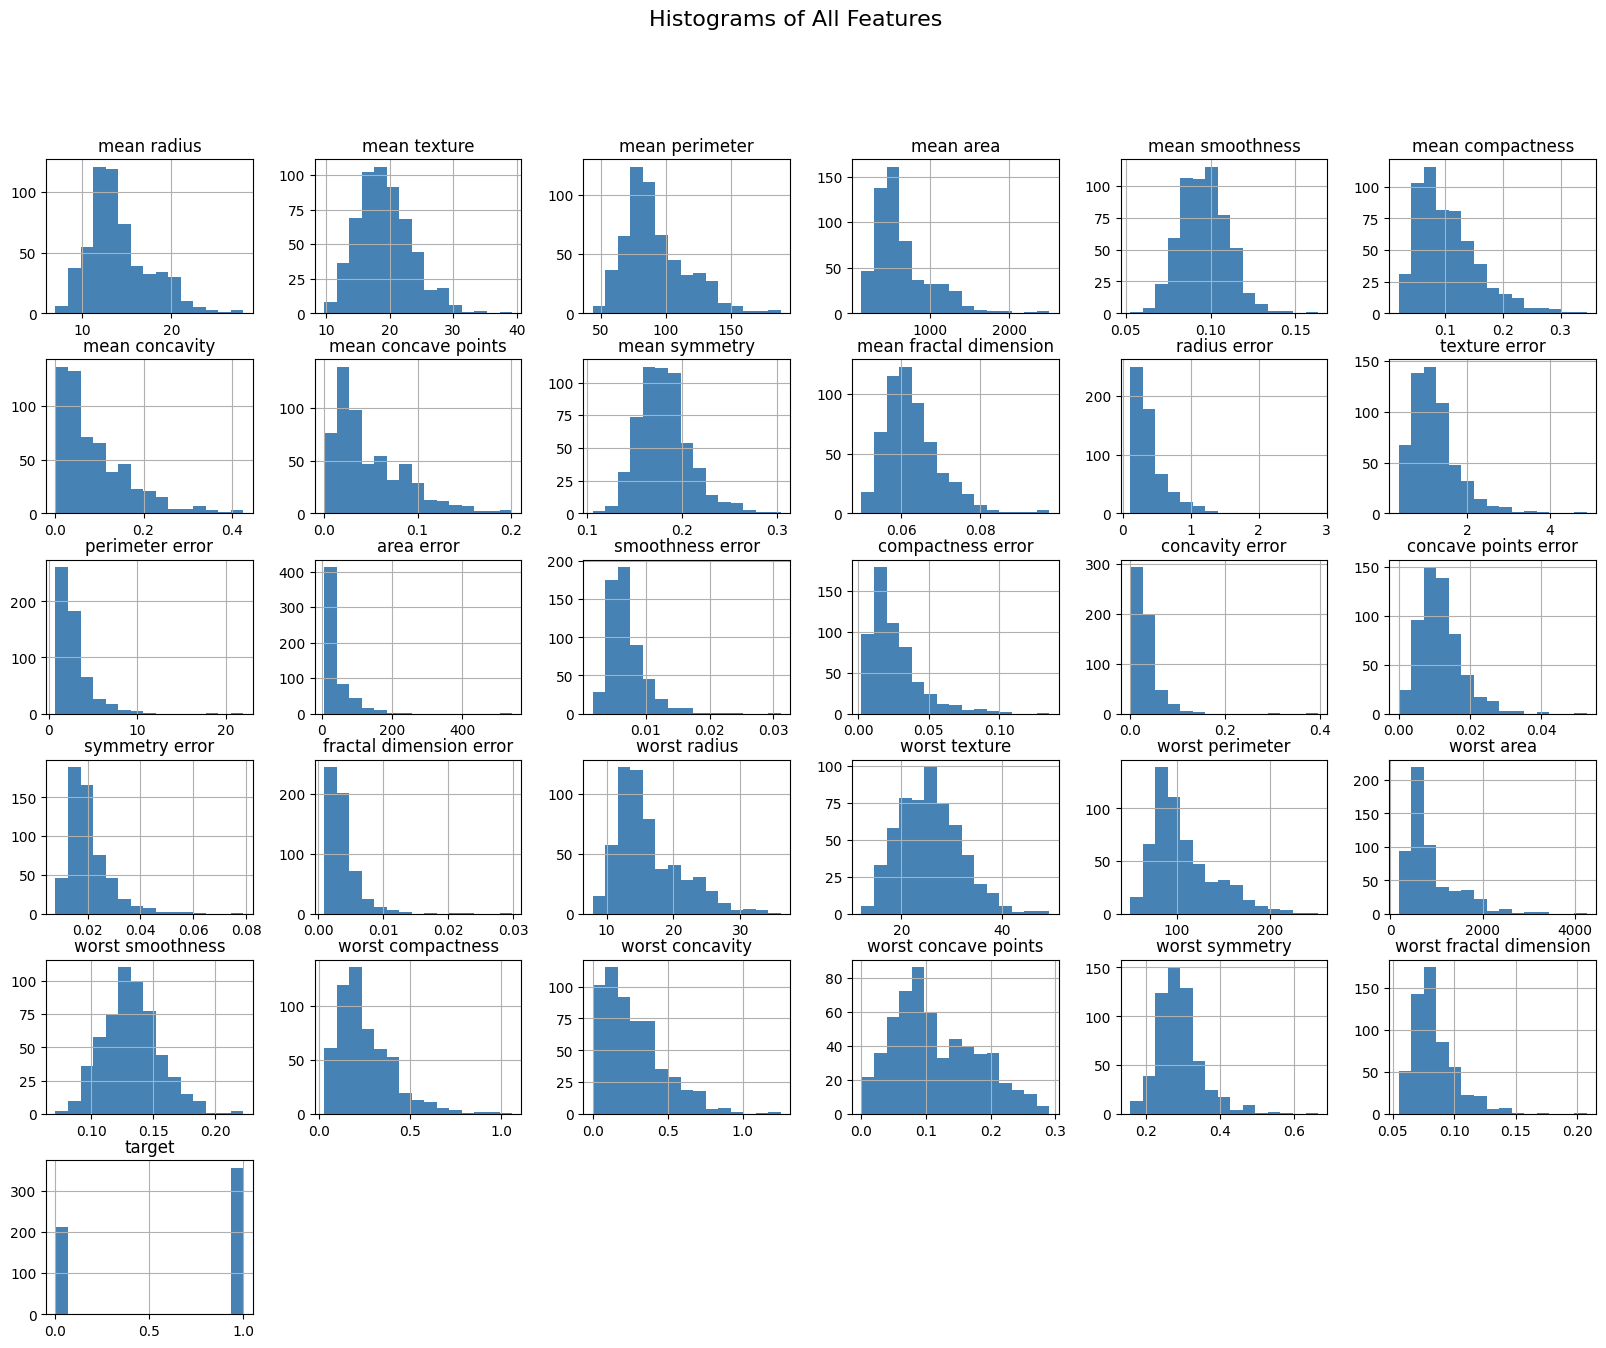

In [99]:
## 1.1 Histograms for Feature Distributions
df.hist(bins=15, figsize=(20, 15), color='steelblue')
plt.suptitle("Histograms of All Features", size=16)
plt.show()


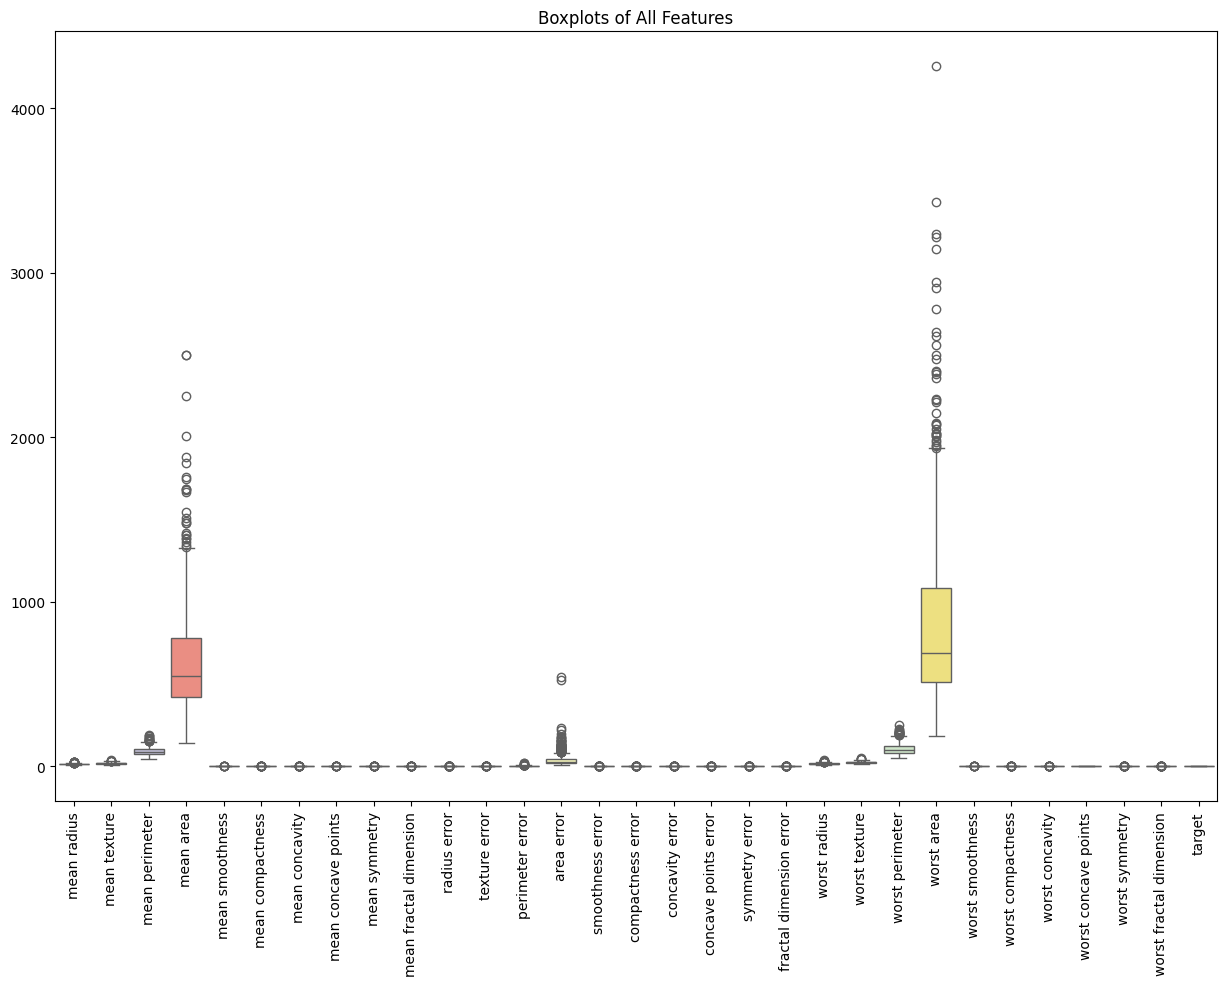

In [100]:
## 1.2 Boxplots to Visualize Outliers and Distribution
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, palette='Set3')
plt.xticks(rotation=90)
plt.title("Boxplots of All Features")
plt.show()

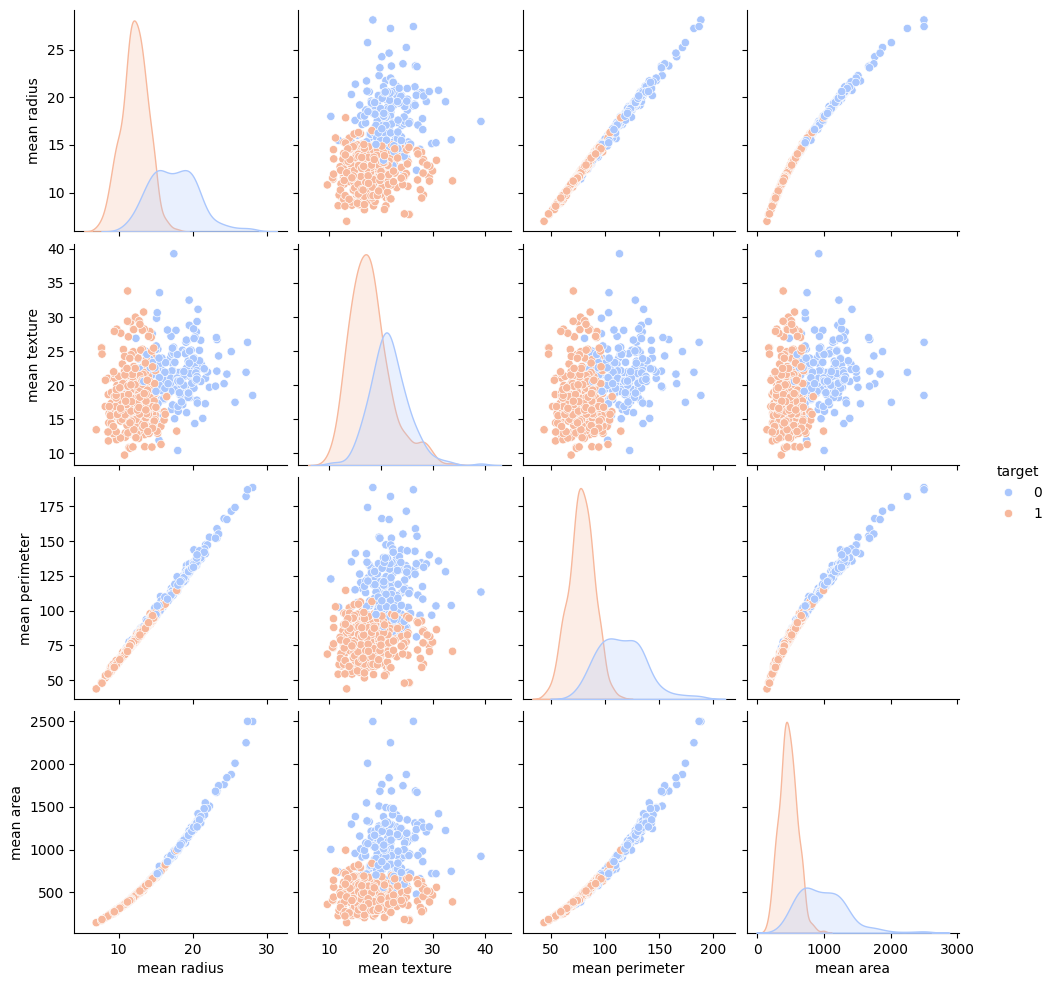

In [101]:
## 1.3 Pair Plot for Selected Features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.show()

/var/folders/p4/_lg8k9xs30x1tc282bsyfmf40000gn/T/ipykernel_1671/1837189634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


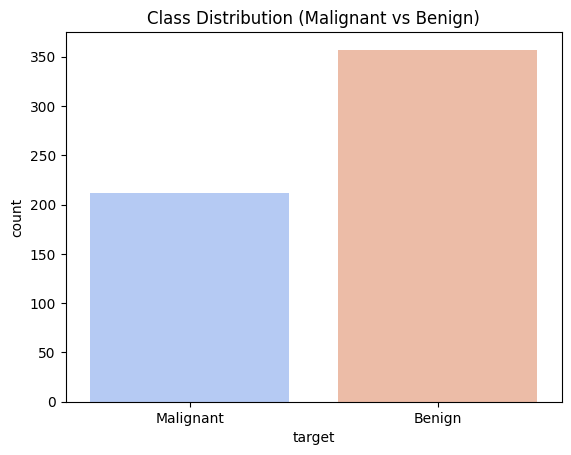

In [102]:
## 1.4 Check Class Imbalance (Malignant vs. Benign)
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Class Distribution (Malignant vs Benign)')
plt.xticks(ticks=[0, 1], labels=["Malignant", "Benign"])
plt.show()


In [103]:
# Display the number of malignant and benign cases
malignant, benign = df['target'].value_counts()
print(f'Malignant: {malignant}, Benign: {benign}')

Malignant: 357, Benign: 212


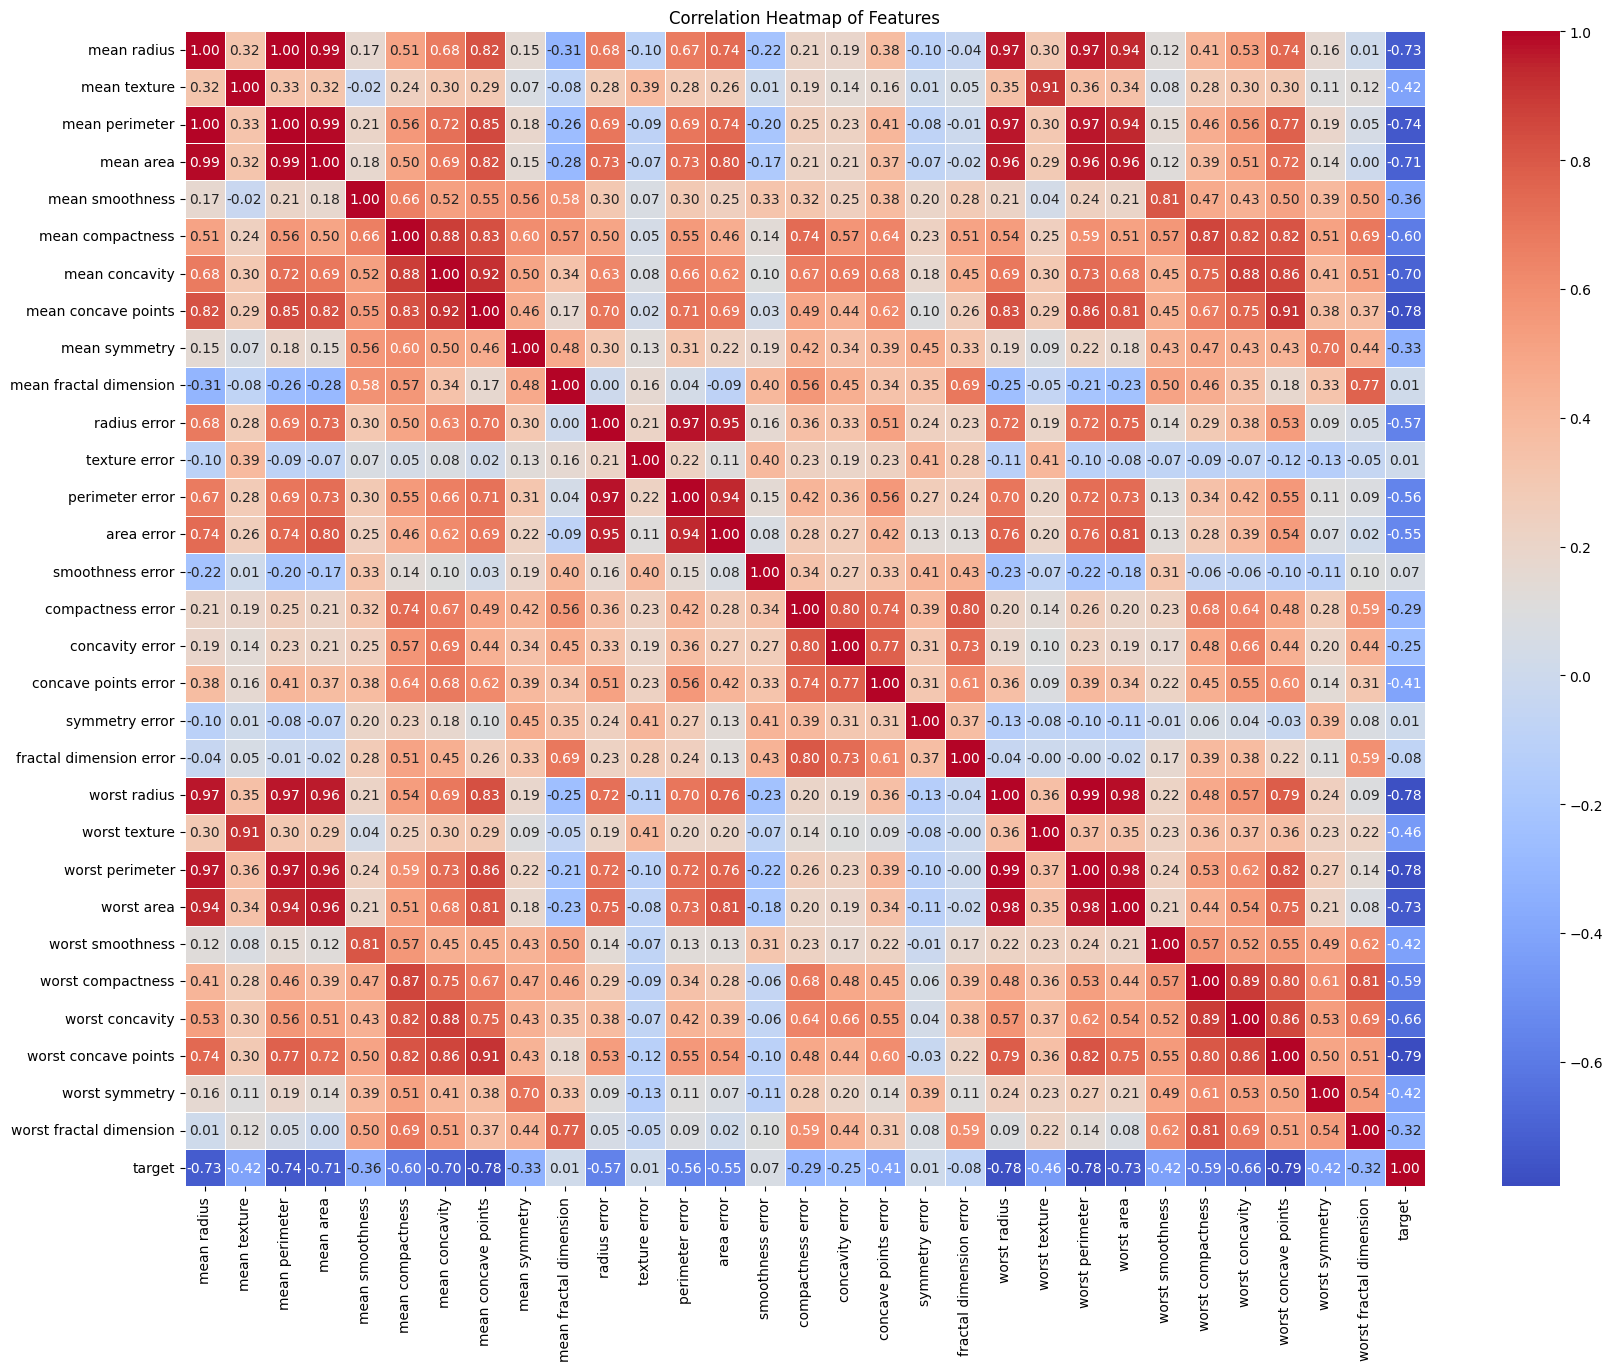

In [104]:
## 1.5 Correlation Analysis Using a Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

 2. Preparing Data for Neural Network

In [105]:
# Splitting the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']


In [106]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
# Standardizing the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

3. Neural Network Model with TensorFlow and Keras

In [108]:
# Setting up the layers of Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),  # Flatten the input features to 1D
    keras.layers.Dense(20, activation='relu'),  # Hidden layer with 20 neurons
    keras.layers.Dense(2, activation='sigmoid')  # Output layer with 2 neurons (binary classification)
])


/Users/sahilsharma/Desktop/Data Science with AI and ML ( 45 days training )/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [109]:
# Compiling the Neural Network
model.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [110]:
# Training the Neural Network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3589 - loss: 0.8898 - val_accuracy: 0.4783 - val_loss: 0.7608
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5639 - loss: 0.6342 - val_accuracy: 0.6957 - val_loss: 0.5488
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8250 - loss: 0.4620 - val_accuracy: 0.9130 - val_loss: 0.4073
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9034 - loss: 0.3483 - val_accuracy: 0.8913 - val_loss: 0.3156
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9207 - loss: 0.2727 - val_accuracy: 0.9348 - val_loss: 0.2563
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9415 - loss: 0.2231 - val_accuracy: 0.9348 - val_loss: 0.2176
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9442 - loss: 0.1903 - val_accuracy: 0.9348 - val_loss: 0.1915
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9492 - loss: 0.1678 - val_accuracy: 0.9565 - val_loss: 0.1734
Epo

4. Visualizing Training Progress


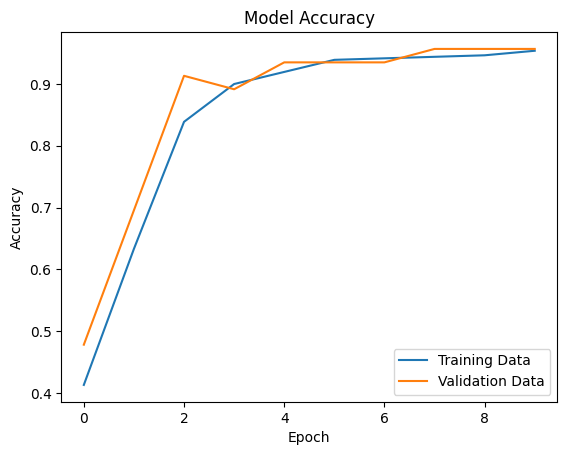

In [111]:
# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show()

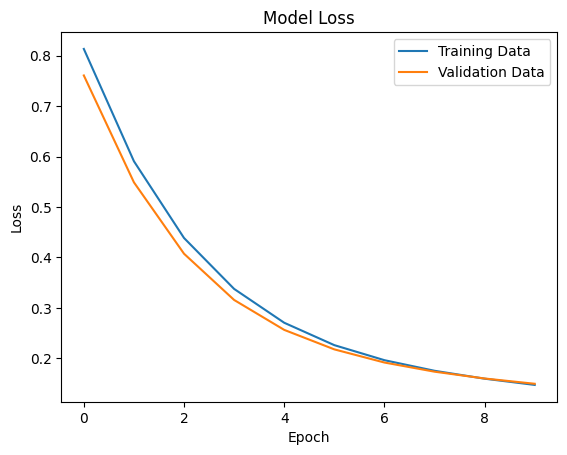

In [112]:
# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper right')
plt.show()


5. Model Evaluation on Test Data

In [113]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9470 - loss: 0.1333 
Test Accuracy: 95.61%


6. Predictions

In [114]:
Y_pred = model.predict(X_test_std)
print(f"Predictions shape: {Y_pred.shape}")
print(f"First Prediction: {Y_pred[0]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Predictions shape: (114, 2)
First Prediction: [0.1861151  0.44817084]


In [115]:
# Converting probabilities to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(f"Predicted Labels: {Y_pred_labels}")

Predicted Labels: [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]


7. Taking User Input for Prediction

In [116]:
# Asking the user to input 30 feature values
print("Please enter the 30 feature values for the tumor (separated by commas):")
input_data = input() 


Please enter the 30 feature values for the tumor (separated by commas):


In [117]:
# Split the input by commas, strip any extra spaces, and filter out empty values
input_data_as_list = [value.strip() for value in input_data.split(',') if value.strip()]

In [118]:
# Ensure that the user has entered 30 values
if len(input_data_as_list) != 30:
    raise ValueError("Please make sure to input exactly 30 feature values.")

ValueError: Please make sure to input exactly 30 feature values.

In [ ]:
# Convert the cleaned list of strings into a list of floats
input_data_as_list = list(map(float, input_data_as_list))


In [ ]:
 #Convert input data to numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

In [ ]:
# Standardizing the input data
input_data_std = scaler.transform(input_data_as_numpy_array)

/Users/sahilsharma/Desktop/Data Science with AI and ML ( 45 days training )/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: ''

In [ ]:
# Making a prediction
prediction = model.predict(input_data_std)
prediction_label = [np.argmax(prediction)]
print(f"Prediction: {prediction}")
print(f"Predicted Label: {prediction_label}")

if prediction_label[0] == 0:
    print("The Tumor is Malignant")
else:
    print("The Tumor is Benign")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Prediction: [[0.06542759 0.86110413]]
Predicted Label: [1]
The Tumor is Benign
